In [ ]:
import pandas as pd
import numpy as np

file_names = ["0.7inner-100watt.csv","0.7inner-200watt.csv","0.7inner-300watt.csv",
              "0.7outer-100watt.csv","0.7outer-200watt.csv","0.7outer-300watt.csv",

              "0.9inner-100watt.csv","0.9inner-200watt.csv","0.9inner-300watt.csv",
              "0.9outer-100watt.csv","0.9outer-200watt.csv","0.9outer-300watt.csv",

              "1.1inner-100watt.csv","1.1inner-200watt.csv","1.1inner-300watt.csv",
              "1.1outer-100watt.csv","1.1outer-200watt.csv","1.1outer-300watt.csv",

              "1.3inner-100watt.csv","1.3inner-200watt.csv","1.3inner-300watt.csv",
              "1.3outer-100watt.csv","1.3outer-200watt.csv","1.3outer-300watt.csv",

              "1.5inner-100watt.csv","1.5inner-200watt.csv","1.5inner-300watt.csv",
              "1.5outer-100watt.csv","1.5outer-200watt.csv","1.5outer-300watt.csv",

              "1.7inner-100watt.csv","1.7inner-200watt.csv","1.7inner-300watt.csv",
              "1.7outer-100watt.csv","1.7outer-200watt.csv","1.7outer-300watt.csv",

              "BRB-12-4-100watt.csv","BRB-12-4-300watt.csv","healthy.csv"]

output_file = 'Combined_file.csv'
new_block = pd.DataFrame()

column_names = [f'column{i}' for i in range(1, 1001)]
column_names.append('label')
pd.DataFrame(columns=column_names).to_csv(output_file, index=False)

# Process each CSV file
for file_name in file_names:
    df = pd.read_csv(file_name)
    df_l = df[' Current-A'].iloc[0:100000]

    # Ensure the length is a multiple of blockksize (1000)
    remainder = len(df_l) % 1000
    if remainder > 0:
        df_l = df_l.iloc[:-remainder]

    blockksize = 1000
    new_block = [df_l[i:i + blockksize] for i in range(0, len(df_l), blockksize)]
    array = pd.DataFrame(np.array(new_block).reshape(-1, 1000))

    array.columns = [f'column{i}' for i in range(1, array.shape[1] + 1)]

    file_name_without_extension = file_name.replace('.csv', '')

    if 'inner' in file_name.lower() or 'outer' in file_name.lower():
        label_parts = file_name_without_extension.split('-')
        array['label'] = label_parts[0]
    elif 'BRB' in file_name.upper():
        label_parts = file_name_without_extension.split('-')
        array['label'] = '-'.join(label_parts[:3])
    else:
        array['label'] = 'healthy'
    array.to_csv(output_file, mode='a', header=False, index=False)

Train_Accuracy = 0.5277161862527716
Train_Precision = 0.5277161862527716
Train_Recall = 0.5277161862527716
Train_F1Score = 0.5277161862527716
Test_Accuracy = 0.2120689655172414
Test_Precision = 0.2120689655172414
Test_Recall = 0.2120689655172414
Test_F1Score = 0.2120689655172414


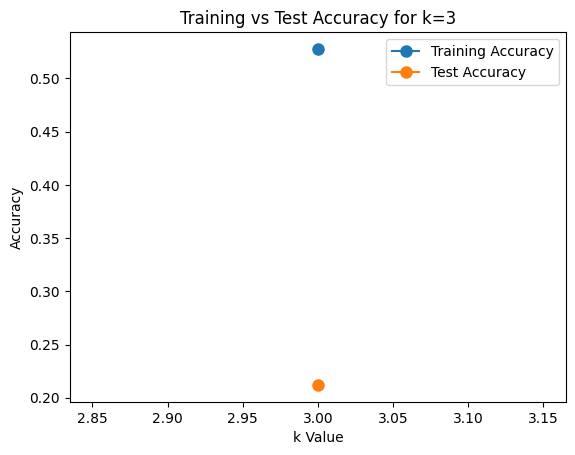

In [5]:
import pandas as pd
import numpy as np
import scipy.stats
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Combined_file.csv')

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(data['label'])
data['label'] = encoded_labels

# Shuffle the data
shuffled_data = shuffle(data)

# Split the dataset into training and testing sets
split_ratio = 0.7
split_index = int(len(shuffled_data) * split_ratio)
train_data = shuffled_data[:split_index]
test_data = shuffled_data[split_index:]

# Separate features and labels
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

def euclidean_distance(instance1, instance2):
    return np.sqrt(np.sum((instance1 - instance2) ** 2))

def knn(test_instance, X_train, y_train, k):
    distances = [euclidean_distance(test_instance, train_instance) for train_instance in X_train]
    nearest_neighbor_ids = np.argsort(distances)[:k]
    nearest_neighbor_labels = y_train[nearest_neighbor_ids]
    prediction,count= scipy.stats.mode(nearest_neighbor_labels)
    return prediction

# Choose a value for k
k_value = 3

# Make predictions on the training set
train_predictions = [knn(train_instance, X_train, y_train, k_value) for train_instance in X_train]

# Make predictions on the test set
test_predictions = [knn(test_instance, X_train, y_train, k_value) for test_instance in X_test]

# Evaluate performance on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, average='micro')
train_recall = recall_score(y_train, train_predictions, average='micro')
train_f1 = f1_score(y_train, train_predictions, average='micro')

# Evaluate performance on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='micro')
test_recall = recall_score(y_test, test_predictions, average='micro')
test_f1 = f1_score(y_test, test_predictions, average='micro')

print(f"Train_Accuracy = {train_accuracy}")
print(f"Train_Precision = {train_precision}")
print(f"Train_Recall = {train_recall}")
print(f"Train_F1Score = {train_f1}")

print(f"Test_Accuracy = {test_accuracy}")
print(f"Test_Precision = {test_precision}")
print(f"Test_Recall = {test_recall}")
print(f"Test_F1Score = {test_f1}")

# Plotting the graph
plt.plot([k_value], [train_accuracy], marker='o', markersize=8, label='Training Accuracy')
plt.plot([k_value], [test_accuracy], marker='o', markersize=8, label='Test Accuracy')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy for k=' + str(k_value))
plt.legend()
plt.show()


In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

k_value = 3
num_folds = 5
X = shuffled_data.drop('label', axis=1).values
y = shuffled_data['label'].values

fold_size = len(X) // num_folds

# Lists to store metrics for each fold
train_accuracies, test_accuracies = [], []
train_precisions, test_precisions = [], []
train_recalls, test_recalls = [], []
train_f1_scores, test_f1_scores = [], []

# Perform k-fold cross-validation
for fold in range(num_folds):
    test_start = fold * fold_size
    test_end = (fold + 1) * fold_size

    X_test_fold = X[test_start:test_end]
    y_test_fold = y[test_start:test_end]

    X_train_fold = np.concatenate([X[:test_start], X[test_end:]])
    y_train_fold = np.concatenate([y[:test_start], y[test_end:]])

    # Make predictions on the training set
    train_predictions = [knn(train_instance, X_train_fold, y_train_fold, k_value) for train_instance in X_train_fold]

    # Make predictions on the test set
    test_predictions = [knn(test_instance, X_train_fold, y_train_fold, k_value) for test_instance in X_test_fold]

    # Evaluate performance on the training set
    train_accuracies.append(accuracy_score(y_train_fold, train_predictions))
    train_precisions.append(precision_score(y_train_fold, train_predictions, average='micro'))
    train_recalls.append(recall_score(y_train_fold, train_predictions, average='micro'))
    train_f1_scores.append(f1_score(y_train_fold, train_predictions, average='micro'))

    # Evaluate performance on the test set
    test_accuracies.append(accuracy_score(y_test_fold, test_predictions))
    test_precisions.append(precision_score(y_test_fold, test_predictions, average='micro'))
    test_recalls.append(recall_score(y_test_fold, test_predictions, average='micro'))
    test_f1_scores.append(f1_score(y_test_fold, test_predictions, average='micro'))

    print(f"Fold {fold + 1}:")
    print(f"Train Accuracy = {train_accuracies[-1]}")
    print(f"Train Precision = {train_precisions[-1]}")
    print(f"Train Recall = {train_recalls[-1]}")
    print(f"Train F1 Score = {train_f1_scores[-1]}")

    print(f"Test Accuracy = {test_accuracies[-1]}")
    print(f"Test Precision = {test_precisions[-1]}")
    print(f"Test Recall = {test_recalls[-1]}")
    print(f"Test F1 Score = {test_f1_scores[-1]}")
    print("=" * 30)

# Print average metrics over all folds
print("Average Metrics:")
print(f"Train Accuracy = {np.mean(train_accuracies)}")
print(f"Train Precision = {np.mean(train_precisions)}")
print(f"Train Recall = {np.mean(train_recalls)}")
print(f"Train F1 Score = {np.mean(train_f1_scores)}")

print(f"Test Accuracy = {np.mean(test_accuracies)}")
print(f"Test Precision = {np.mean(test_precisions)}")
print(f"Test Recall = {np.mean(test_recalls)}")
print(f"Test F1 Score = {np.mean(test_f1_scores)}")


Fold 1:
Train Accuracy = 0.5341092790171355
Train Precision = 0.5341092790171355
Train Recall = 0.5341092790171355
Train F1 Score = 0.5341092790171355
Test Accuracy = 0.1888745148771022
Test Precision = 0.1888745148771022
Test Recall = 0.1888745148771022
Test F1 Score = 0.18887451487710222
Fold 2:
Train Accuracy = 0.5292596184933721
Train Precision = 0.5292596184933721
Train Recall = 0.5292596184933721
Train F1 Score = 0.5292596184933721
Test Accuracy = 0.23415265200517466
Test Precision = 0.23415265200517466
Test Recall = 0.23415265200517466
Test F1 Score = 0.23415265200517466
Fold 3:
Train Accuracy = 0.5341092790171355
Train Precision = 0.5341092790171355
Train Recall = 0.5341092790171355
Train F1 Score = 0.5341092790171355
Test Accuracy = 0.2108667529107374
Test Precision = 0.2108667529107374
Test Recall = 0.2108667529107374
Test F1 Score = 0.2108667529107374
Fold 4:
Train Accuracy = 0.533462657613967
Train Precision = 0.533462657613967
Train Recall = 0.533462657613967
Train F1 Scor

In [12]:
import pandas as pd
import numpy as np
import scipy.stats
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = shuffled_data.drop('label', axis=1).values
y = shuffled_data['label'].values

# Function to perform PCA
def perform_pca(X, num_components):
    # Center the data
    mean_vector = np.mean(X, axis=0)
    centered_data = X - mean_vector

    # Calculate the covariance matrix
    covariance_matrix = np.cov(centered_data, rowvar=False)

    # Calculate the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort eigenvectors based on eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top 'num_components' eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :num_components]

    # Project the data onto the selected eigenvectors
    pca_data = centered_data.dot(selected_eigenvectors)

    return pca_data

# Function to calculate Euclidean distance
def euclidean_distance(instance1, instance2):
    return np.sqrt(np.sum((instance1 - instance2) ** 2))

# Function to perform k-NN
def knn(test_instance, X_train, y_train, k):
    distances = [euclidean_distance(test_instance, train_instance) for train_instance in X_train]
    nearest_neighbor_ids = np.argsort(distances)[:k]
    nearest_neighbor_labels = y_train[nearest_neighbor_ids]
    prediction,count = scipy.stats.mode(nearest_neighbor_labels)
    return prediction

# Function to calculate precision, recall, and F1 score
def calculate_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='micro')
    recall = recall_score(y_true, y_pred, average='micro')
    f1 = f1_score(y_true, y_pred, average='micro')
    return precision, recall, f1

# Function to perform k-fold cross-validation
def k_fold_cross_validation(X, y, k_value, num_folds):
    fold_size = len(X) // num_folds

    # Lists to store metrics for each fold
    accuracies, precisions, recalls, f1_scores = [], [], [], []

    for fold in range(num_folds):
        test_start = fold * fold_size
        test_end = (fold + 1) * fold_size

        X_test_fold = X[test_start:test_end]
        y_test_fold = y[test_start:test_end]

        X_train_fold = np.concatenate([X[:test_start], X[test_end:]])
        y_train_fold = np.concatenate([y[:test_start], y[test_end:]])

        # Perform PCA (You can choose the number of components)
        num_components = 5  # Example: Use 5 principal components
        X_train_fold_pca = perform_pca(X_train_fold, num_components)
        X_test_fold_pca = perform_pca(X_test_fold, num_components)

        # Make predictions on the test set
        test_predictions = [knn(test_instance, X_train_fold_pca, y_train_fold, k_value) for test_instance in X_test_fold_pca]

        # Evaluate performance on the test set
        test_accuracy = accuracy_score(y_test_fold, test_predictions)
        precision, recall, f1 = calculate_metrics(y_test_fold, test_predictions)

        accuracies.append(test_accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

        print(f"Fold {fold + 1} - Test Accuracy: {test_accuracy}")
        print(f"Fold {fold + 1} - Precision: {precision}")
        print(f"Fold {fold + 1} - Recall: {recall}")
        print(f"Fold {fold + 1} - F1 Score: {f1}")
        print("=" * 30)

    # Print average metrics over all folds
    print(f"Average Test Accuracy: {np.mean(accuracies)}")
    print(f"Average Precision: {np.mean(precisions)}")
    print(f"Average Recall: {np.mean(recalls)}")
    print(f"Average F1 Score: {np.mean(f1_scores)}")

# Set the k value and number of folds
k_value = 3
num_folds = 5

# Perform k-fold cross-validation
k_fold_cross_validation(X, y, k_value, num_folds)


Fold 1 - Test Accuracy: 0.17076326002587322
Fold 1 - Precision: 0.17076326002587322
Fold 1 - Recall: 0.17076326002587322
Fold 1 - F1 Score: 0.17076326002587322
Fold 2 - Test Accuracy: 0.18240620957309184
Fold 2 - Precision: 0.18240620957309184
Fold 2 - Recall: 0.18240620957309184
Fold 2 - F1 Score: 0.18240620957309187
Fold 3 - Test Accuracy: 0.18240620957309184
Fold 3 - Precision: 0.18240620957309184
Fold 3 - Recall: 0.18240620957309184
Fold 3 - F1 Score: 0.18240620957309187
Fold 4 - Test Accuracy: 0.16946959896507116
Fold 4 - Precision: 0.16946959896507116
Fold 4 - Recall: 0.16946959896507116
Fold 4 - F1 Score: 0.16946959896507116
Fold 5 - Test Accuracy: 0.17981888745148772
Fold 5 - Precision: 0.17981888745148772
Fold 5 - Recall: 0.17981888745148772
Fold 5 - F1 Score: 0.17981888745148772
Average Test Accuracy: 0.17697283311772316
Average Precision: 0.17697283311772316
Average Recall: 0.17697283311772316
Average F1 Score: 0.17697283311772316


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats
import math
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('Combined_file.csv')
labels = data['label']
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
data['label'] = encoded_labels

data.to_csv('Encoded_File.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

# Load the CSV file into a DataFrame
file_path = 'Encoded_File.csv'
df = pd.read_csv(file_path)

# Shuffle the DataFrame randomly
shuffled_data = shuffle(df)

# Save the shuffled DataFrame to a new CSV file
shuffled_data.to_csv('Shuffled_Encoded_File.csv', index=False)

In [ ]:
import pandas as pd
dataset = pd.read_csv('Shuffled_Encoded_File.csv')
def split_dataset(dataset, split_ratio):
    split_index = int(len(dataset) * split_ratio)
    train_set = dataset[:split_index]
    test_set = dataset[split_index:]
    return train_set, test_set
train_data, test_data = split_dataset(dataset, split_ratio=0.70)
print(train_data.shape)
print(test_data.shape)

In [ ]:
X = train_data.drop('label', axis=1)
X = X.values
y = train_data['label']
y = y.values

print(X)
print(len(X))
print(y)

[[2.6093 2.6093 2.6093 ... 2.6227 2.6227 2.6227]
 [2.8144 2.8144 2.8144 ... 3.0342 3.0342 3.0342]
 [1.9402 1.9402 1.9402 ... 2.1661 2.1661 2.1661]
 ...
 [2.5763 2.5763 2.5763 ... 3.     3.     3.    ]
 [2.9853 2.9853 2.9853 ... 2.4115 2.4115 2.4115]
 [2.873  2.873  2.873  ... 2.1441 2.1441 2.1441]]
2706
[ 8 12  6 ...  5  0  0]


In [ ]:
import numpy as np
WithOutlableClass=test_data.drop('label',axis=1)
WithOutlableClass=WithOutlableClass.values;
print(len(WithOutlableClass))
Ground_value=test_data['label']
Ground_value=Ground_value.values
Ground_value

1160


array([11, 10,  6, ...,  6, 11,  4])

Test_Accuracy = 0.20689655172413793
Test_Precision = 0.20689655172413793
Test_Recall = 0.20689655172413793
Test_F1Score = 0.20689655172413793
Train_Accuracy = 0.5280857354028086
Train_Precision = 0.5280857354028086
Train_Recall = 0.5280857354028086
Train_F1Score = 0.5280857354028086


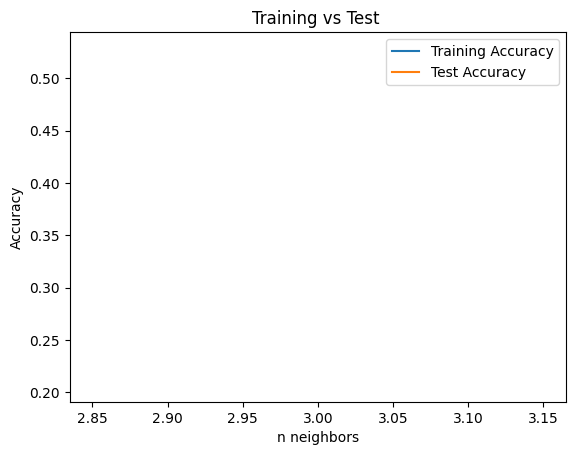

In [ ]:
#Find Euclidean distance between test sample and all training samples
#You will write the code to find the Euclidean distance
import scipy.stats
import math
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score ,accuracy_score

def euclidean_distance(instance1, instance2):
    return np.sqrt(np.sum((instance1 - instance2)**2))

predictions=[]
def knn(testinstance,X,k):
  distances=[]
  for trianInstace in X:
    distances.append(euclidean_distance(testinstance,trianInstace))
  nearest_neighbor_ids = np.argsort(distances)[:k]
  nearest_neighbor_rings = y[nearest_neighbor_ids]
  prediction,count = scipy.stats.mode(nearest_neighbor_rings)
  return prediction;

KValues =[3]
for k in KValues:
  trian_predictions=[knn(trainDataset,X,k) for trainDataset in X]
  test_predictions=[knn(test_instance,X,k) for test_instance in WithOutlableClass ]

#FInd Train Accuracy,Recall,Precision,F1Score
  train_accuracy = accuracy_score(y, trian_predictions)
  train_precision=precision_score(y, trian_predictions, average='micro')
  train_recall = recall_score(y, trian_predictions,average='micro')
  train_f1 = f1_score(y, trian_predictions,average='micro')

#Find Test Accuracy,Recall,Precision,F1Score
  precision=precision_score(Ground_value, test_predictions, average='micro')
  recall = recall_score(Ground_value,test_predictions,average='micro')
  f1 = f1_score(Ground_value ,test_predictions,average='micro')
  accuracy = accuracy_score(Ground_value, test_predictions)

print(f"Test_Accuracy = {precision}")
print(f"Test_Precision = {f1}")
print(f"Test_Recall = {recall}")
print(f"Test_F1Score = {precision}")

print(f"Train_Accuracy = {train_accuracy}")
print(f"Train_Precision = {train_precision}")
print(f"Train_Recall = {train_recall}")
print(f"Train_F1Score = {train_f1}")


# Plotting the graph
plt.plot(KValues, train_accuracy , label='Training Accuracy')
plt.plot(KValues, accuracy, label='Test Accuracy')
plt.xlabel('n neighbors')
plt.ylabel('Accuracy')
plt.title('Training vs Test ')
plt.legend()
plt.show()



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.stats

# Define the euclidean_distance function (you can replace it with an appropriate distance function)
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

# Assuming you have defined the knn function somewhere in your code
def knn(test_instance, X, k):
    distances = [euclidean_distance(test_instance, train_instance) for train_instance in X]
    nearest_neighbor_ids = np.argsort(distances)[:k]
    nearest_neighbor_rings = y[nearest_neighbor_ids]
    prediction, count = scipy.stats.mode(nearest_neighbor_rings)
    return prediction

def custom_cross_val(X, y, k, folds=10):
    fold_size = len(X) // folds
    accuracies = []

    for i in range(folds):
        start, end = i * fold_size, (i + 1) * fold_size
        X_train = np.concatenate((X[:start], X[end:]))
        y_train = np.concatenate((y[:start], y[end:]))
        X_test, y_test = X[start:end], y[start:end]

        test_predictions = [knn(test_instance, X_train, k) for test_instance in X_test]

        test_accuracy = accuracy_score(y_test, test_predictions)
        accuracies.append(test_accuracy)
        print(f"Fold {i + 1} Test Accuracy: {test_accuracy}")

    return np.mean(accuracies)

# Load your dataset
data = pd.read_csv('Shuffled_Encoded_File.csv')

X = data.drop('label', axis=1)
y = data['label']

# Normalize or Standardize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Choose the number of components for PCA
num_components = 5

# Apply PCA on the entire dataset
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_normalized)

# Split the data into training and testing sets (80:20 ratio) using the PCA-transformed data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

KValues = [8]
for k in KValues:
    train_predictions = [knn(trainDataset, X_train_pca, k) for trainDataset in X_train_pca]
    test_predictions = [knn(test_instance, X_train_pca, k) for test_instance in X_test_pca]

    train_accuracy = accuracy_score(y_train, train_predictions)
    train_precision = precision_score(y_train, train_predictions, average='micro')
    train_recall = recall_score(y_train, train_predictions, average='micro')
    train_f1 = f1_score(y_train, train_predictions, average='micro')

    print(f"Train_Accuracy = {train_accuracy}")
    print(f"Train_Precision = {train_precision}")
    print(f"Train_Recall = {train_recall}")
    print(f"Train_F1Score = {train_f1}")

    cross_val_accuracy = custom_cross_val(X_train_pca, y_train, k)
    print(f"Custom Cross-Validation Accuracy (k={k}): {cross_val_accuracy}")

# Plotting the graph
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, num_components + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()
